# **Import Library and data**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Scientist/Weekly Project/Week 3 - 4/vgsales.csv')
console_sales = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Scientist/Weekly Project/Week 3 - 4/VGchart_console_sales.csv')
console_sales_game = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Scientist/Weekly Project/Week 3 - 4/VGchart_console_software_sales.csv')
console_sales_ratio = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Scientist/Weekly Project/Week 3 - 4/VGchart_console_ratio.csv')

# **Overview data**

## **Drop, check duplicate and null**

In [ ]:
# df.head()
# console_sales.head()
# console_game_sales.head()
console_sales_ratio.head()

,Unnamed: 0,Platform,North America,Europe,Japan,Order_Sales,Global
0,0,Xbox 360 (X360),12.43,10.90,7.77,11.21,11.75
1,1,PlayStation 3 (PS3),13.62,9.89,7.92,11.59,11.15
2,2,Xbox (XB),12.16,9.20,7.32,8.33,11.01
3,3,PlayStation 2 (PS2),12.27,10.20,9.60,8.50,10.54
4,4,GameCube (GC),10.76,9.01,6.82,8.52,9.60


### **Drop columns, change name columns**

In [ ]:
# console_sales drop columns Unnamed:0 and change name cloumns
console_sales.drop(columns='Unnamed: 0', inplace= True)
console_sales.rename(columns={'North America': 'NA_Sales','Europe':'EU_Sales','Japan':'JP_Sales','Order_Sales':'Other_Sales','Global':'Global_Sales'},inplace=True)

In [ ]:
# console_game_sales drop columns Unnamed:0 and change name cloumns
console_sales_game.drop(columns='Unnamed: 0', inplace= True)
console_sales_game.rename(columns={'North America': 'NA_Sales','Europe':'EU_Sales','Japan':'JP_Sales','Order_Sales':'Other_Sales','Global':'Global_Sales'},inplace=True)

In [ ]:
# console_sales_ratio drop columns Unnamed:0 and change name cloumns
console_sales_ratio.drop(columns='Unnamed: 0', inplace= True)
console_sales_ratio.rename(columns={'North America': 'NA_Sales','Europe':'EU_Sales','Japan':'JP_Sales','Order_Sales':'Other_Sales','Global':'Global_Sales'},inplace=True)

In [ ]:
# Overview data after drop console_sales
console_sales.info()
console_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      36 non-null     object 
 1   NA_Sales      36 non-null     float64
 2   EU_Sales      36 non-null     float64
 3   JP_Sales      36 non-null     float64
 4   Other_Sales   36 non-null     float64
 5   Global_Sales  36 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.8+ KB


,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
1,Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
2,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
3,PlayStation 4 (PS4),38.31,48.48,9.37,20.10,116.26
4,PlayStation (PS),40.78,31.09,21.59,9.04,102.50


In [ ]:
# change values 1,661.95, 1,008.03 to 1661.95, 1008.03
console_sales_game['Global_Sales'] = console_sales_game['Global_Sales'].replace({'1,661.95':'1661.95','1,008.03':'1008.03'})

In [ ]:
# change type to float
console_sales_game['Global_Sales'] = console_sales_game['Global_Sales'].astype('float')

In [ ]:
# console_game_sales
console_sales_game.info()
console_sales_game

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      36 non-null     object 
 1   NA_Sales      36 non-null     float64
 2   EU_Sales      36 non-null     float64
 3   JP_Sales      36 non-null     float64
 4   Other_Sales   36 non-null     float64
 5   Global_Sales  36 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.8+ KB


,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PlayStation 2 (PS2),658.26,563.77,222.60,217.32,1661.95
1,Xbox 360 (X360),610.56,281.93,12.90,102.64,1008.03
2,PlayStation 3 (PS3),400.56,346.10,82.94,145.21,974.81
3,Wii (Wii),509.91,269.66,69.70,116.51,965.78
4,PlayStation (PS),357.97,280.90,244.10,79.04,962.01
5,Nintendo DS (DS),391.01,195.55,178.68,79.50,844.74
6,PlayStation 4 (PS4),211.65,257.33,34.75,92.04,595.77
7,Nintendo Entertainment System (NES),228.08,42.21,225.86,5.33,501.48
8,Game Boy (GB),187.75,147.30,157.06,9.00,501.11
9,Super Nintendo Entertainment System (SNES),132.98,47.25,194.85,3.98,379.06


In [ ]:
# console_sales_ratio Overview console_sales
console_sales_ratio.info()
console_sales_ratio.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      36 non-null     object 
 1   NA_Sales      36 non-null     float64
 2   EU_Sales      36 non-null     float64
 3   JP_Sales      36 non-null     float64
 4   Other_Sales   36 non-null     float64
 5   Global_Sales  36 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.8+ KB


,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Xbox 360 (X360),12.43,10.90,7.77,11.21,11.75
1,PlayStation 3 (PS3),13.62,9.89,7.92,11.59,11.15
2,Xbox (XB),12.16,9.20,7.32,8.33,11.01
3,PlayStation 2 (PS2),12.27,10.20,9.60,8.50,10.54
4,GameCube (GC),10.76,9.01,6.82,8.52,9.60


### **check duplicate**

In [ ]:
# check df duplicate
df.duplicated().sum()

0

In [ ]:
# check console_sales duplicate
console_sales.duplicated().sum()

0

In [ ]:
# check console_sales_game duplicate
console_sales_game.duplicated().sum()

0

In [ ]:
# check console_sales_ratio duplicate
console_sales_ratio.duplicated().sum()

0

### **Check null**

In [ ]:
# check df null
# df.dropna(inplace=True)
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# check console_sales null
console_sales.isnull().sum()

Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
# check console_sales_game null
console_sales_game.isnull().sum()

Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
# check console_sales_ratio null
console_sales_ratio.isnull().sum()

Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# **Split platform name to platform fullname and platform**

## **platform fullname and platform**

In [ ]:
# function take full name of Platform
def get_prefix_fullname(name):
    return name.split('(')[0]

In [ ]:
# apply on console_sales
console_sales['Platform_Fullname'] = console_sales['Platform'].apply(get_prefix_fullname)

In [ ]:
# apply on console_sales_game
console_sales_game['Platform_Fullname'] = console_sales_game['Platform'].apply(get_prefix_fullname)

In [ ]:
# apply on console_sales_ratio
console_sales_ratio['Platform_Fullname'] = console_sales_ratio['Platform'].apply(get_prefix_fullname)

In [ ]:
# fuction take platform 
def get_prefix_Platform(name):
    return name.split('(')[1].split(')')[0]

In [ ]:
# apply on console_sales
console_sales['Platform'] = console_sales['Platform'].apply(get_prefix_Platform)

In [ ]:
# apply on console_sales_game
console_sales_game['Platform'] = console_sales_game['Platform'].apply(get_prefix_Platform)

In [ ]:
# apply on console_sales_ratio
console_sales_ratio['Platform'] = console_sales_ratio['Platform'].apply(get_prefix_Platform)

## **Overview again**

In [ ]:
console_sales = console_sales[['Platform_Fullname','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
console_sales.head()

,Platform_Fullname,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PlayStation 2,PS2,53.65,55.28,23.18,25.57,157.68
1,Nintendo DS,DS,57.39,52.07,33.01,12.43,154.90
2,Game Boy,GB,43.18,40.05,32.47,2.99,118.69
3,PlayStation 4,PS4,38.31,48.48,9.37,20.10,116.26
4,PlayStation,PS,40.78,31.09,21.59,9.04,102.50


In [ ]:
console_sales_game = console_sales_game[['Platform_Fullname','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
console_sales_game.head()

,Platform_Fullname,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PlayStation 2,PS2,658.26,563.77,222.60,217.32,1661.95
1,Xbox 360,X360,610.56,281.93,12.90,102.64,1008.03
2,PlayStation 3,PS3,400.56,346.10,82.94,145.21,974.81
3,Wii,Wii,509.91,269.66,69.70,116.51,965.78
4,PlayStation,PS,357.97,280.90,244.10,79.04,962.01


In [ ]:
console_sales_ratio = console_sales_ratio[['Platform_Fullname','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
console_sales_ratio.head()

,Platform_Fullname,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Xbox 360,X360,12.43,10.90,7.77,11.21,11.75
1,PlayStation 3,PS3,13.62,9.89,7.92,11.59,11.15
2,Xbox,XB,12.16,9.20,7.32,8.33,11.01
3,PlayStation 2,PS2,12.27,10.20,9.60,8.50,10.54
4,GameCube,GC,10.76,9.01,6.82,8.52,9.60


# **Manufactor crate and crate dataframe Area**

## **Manufactor crate**

In [ ]:
# Create function get Manufactor of platform 
def distribue_platform(x):
  if x == 'Wii':
    return 'Nintendo'
  elif x == 'WiiU':
    return 'Nintendo'
  elif x == 'NES':
    return 'Nintendo'
  elif x == 'GB':
    return 'Nintendo'
  elif x == 'DS':
    return 'Nintendo'
  elif x == 'N64':
    return 'Nintendo'
  elif x == 'SNES':
    return 'Nintendo'
  elif x == 'GBA':
    return 'Nintendo'
  elif x == '3DS':
    return 'Nintendo'
  elif x == 'GC':
    return 'Nintendo'
  elif x == 'NS':
    return 'Nintendo'
  elif x == 'X360':
    return 'Microsoft'
  elif x == 'XB':
    return 'Microsoft'
  elif x == 'XOne':
    return 'Microsoft'
  elif x == 'XS':
    return 'Microsoft'
  elif x == 'PS3':
    return 'Sony'
  elif x == 'PS5':
    return 'Sony'  
  elif x == 'PS2':
    return 'Sony'
  elif x == 'PS4':
    return 'Sony'
  elif x == 'PS':
    return 'Sony'
  elif x == 'PSP':
    return 'Sony'
  elif x == 'PSV':
    return 'Sony'
  elif x == '2600':
    return 'Atari'
  elif x == '7800':
    return 'Atari'
  elif x == 'GEN':
    return 'Saga'
  elif x == 'DC':
    return 'Saga'
  elif x == 'SAT':
    return 'Saga'
  elif x == 'SCD':
    return 'Saga'
  elif x == 'GG':
    return 'Saga'
  elif x == 'WS':
    return 'Namco Bandai'
  elif x == 'NG':
    return 'SNK'
  elif x == 'TG16':
    return 'NEC'
  elif x == 'PCFX':
    return 'NEC'
  elif x == '3DO':
    return 'Sanyo'
  elif x == 'PC':
    return 'Order'
  elif x == 'iOS':
    return 'Apple'

In [ ]:
# apply to df
df['Manufactor'] = df['Platform'].apply(distribue_platform)

In [ ]:
# Get min date year
df_year_release = df.groupby('Platform')['Year'].min().reset_index()

In [ ]:
#Merge df_year_release and console_sales
console_sales_year = pd.merge(console_sales,df_year_release, how='left',on='Platform')

In [ ]:
# check console_sales_year Null
console_sales_year[console_sales_year['Year'].isna()]

,Platform_Fullname,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year
6,Nintendo Switch,NS,33.15,23.14,20.70,11.98,88.97,NaN
23,PlayStation 5,PS5,4.18,3.70,0.92,1.43,10.23,NaN
26,Xbox Series X/S,XS,3.37,1.91,0.07,0.97,6.32,NaN
27,Atari 7800,7800,4.30,0.00,0.00,0.00,4.30,NaN
31,iOS,iOS,0.00,0.00,0.00,0.00,0.00,NaN


In [ ]:
# fillna values
console_sales_year.iloc[6] = console_sales_year.iloc[6].fillna('2017')
console_sales_year.iloc[23] = console_sales_year.iloc[23].fillna('2020')
console_sales_year.iloc[26] = console_sales_year.iloc[26].fillna('2020')
console_sales_year.iloc[27] = console_sales_year.iloc[27].fillna('1986')

In [ ]:
# drop row
console_sales_year.drop(index=[29,30,31,32,33,34,35],inplace=True)

In [ ]:
#Crate columns Manufactor in console_sales_year
console_sales_year['Manufactor'] = console_sales_year['Platform'].apply(distribue_platform)

In [ ]:
console_sales_game['Manufactor'] = console_sales_game['Platform'].apply(distribue_platform)

In [ ]:
console_sales_ratio['Manufactor'] = console_sales_ratio['Platform'].apply(distribue_platform)

## **Console by Area**

In [ ]:
console_Manu_NA = console_sales_year.groupby('Manufactor')['NA_Sales'].sum().reset_index()
console_Manu_NA

,Manufactor,NA_Sales
0,Atari,23.54
1,Microsoft,97.15
2,Namco Bandai,0.00
3,Nintendo,340.65
4,Saga,28.11
5,Sony,190.39


In [ ]:
console_Manu_EU = console_sales_year.groupby('Manufactor')['EU_Sales'].sum().reset_index()
console_Manu_EU

,Manufactor,EU_Sales
0,Atari,3.35
1,Microsoft,45.47
2,Namco Bandai,0.00
3,Nintendo,222.30
4,Saga,14.65
5,Sony,203.19


In [ ]:
console_Manu_JP = console_sales_year.groupby('Manufactor')['JP_Sales'].sum().reset_index()
console_Manu_JP

,Manufactor,JP_Sales
0,Atari,0.00
1,Microsoft,2.31
2,Namco Bandai,1.12
3,Nintendo,190.00
4,Saga,13.41
5,Sony,91.46


In [ ]:
console_Manu_other = console_sales_year.groupby('Manufactor')['Other_Sales'].sum().reset_index()
console_Manu_other

,Manufactor,Other_Sales
0,Atari,0.75
1,Microsoft,15.82
2,Namco Bandai,0.00
3,Nintendo,48.35
4,Saga,1.01
5,Sony,86.34


In [ ]:
console_Manu_global = console_sales_year.groupby('Manufactor')['Global_Sales'].sum().reset_index()
console_Manu_global

,Manufactor,Global_Sales
0,Atari,27.64
1,Microsoft,160.75
2,Namco Bandai,1.12
3,Nintendo,801.30
4,Saga,57.18
5,Sony,571.38


# **Visualize**

## **Console_game**

In [ ]:
console_sales_year.head()

,Platform_Fullname,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year,Manufactor
0,PlayStation 2,PS2,53.65,55.28,23.18,25.57,157.68,2000,Sony
1,Nintendo DS,DS,57.39,52.07,33.01,12.43,154.90,1985,Nintendo
2,Game Boy,GB,43.18,40.05,32.47,2.99,118.69,1988,Nintendo
3,PlayStation 4,PS4,38.31,48.48,9.37,20.10,116.26,2013,Sony
4,PlayStation,PS,40.78,31.09,21.59,9.04,102.50,1994,Sony


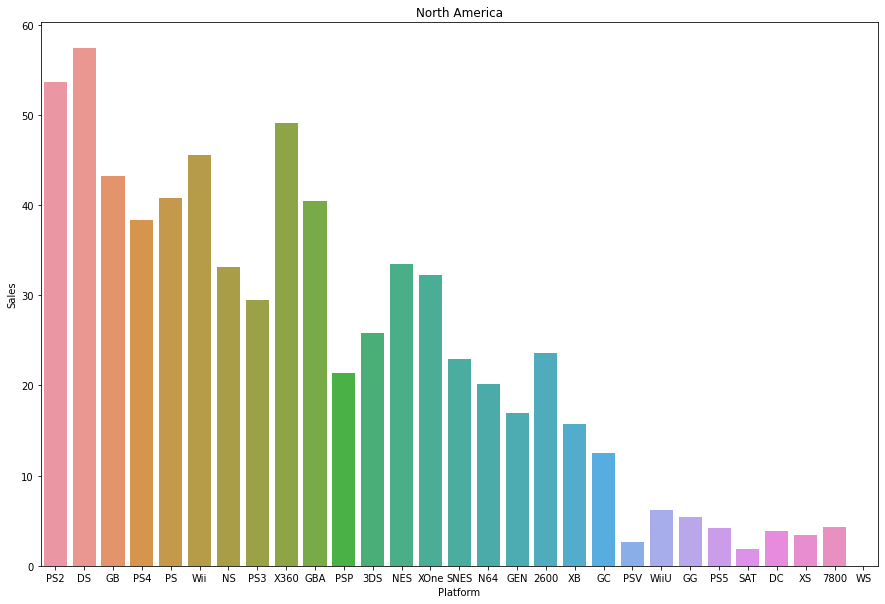

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'NA_Sales')
plt.title('North America')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

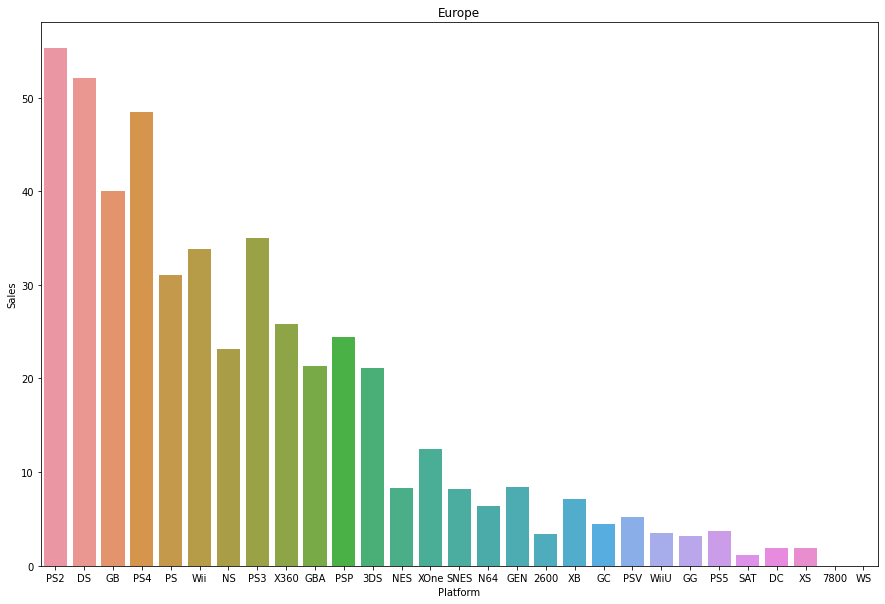

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'EU_Sales')
plt.title('Europe')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

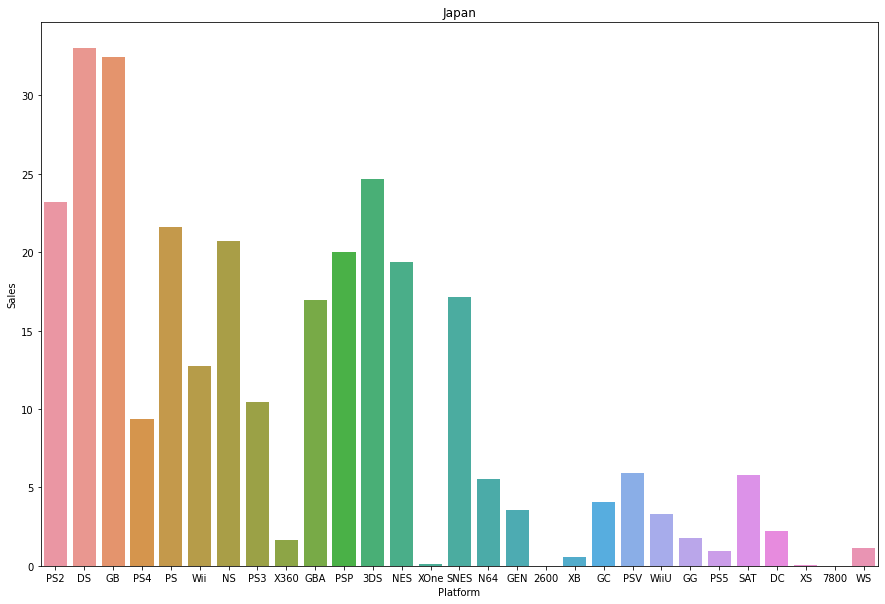

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'JP_Sales')
plt.title('Japan')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

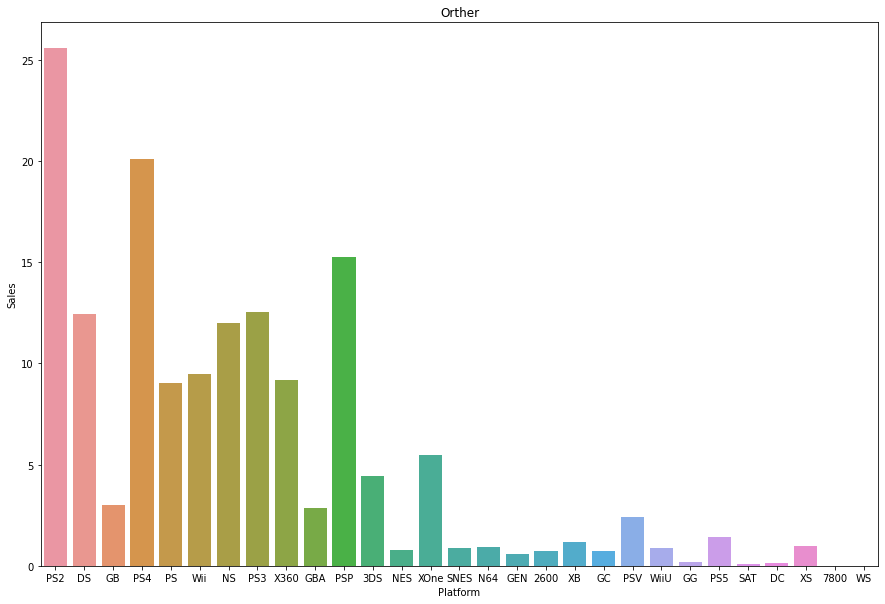

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'Other_Sales')
plt.title('Orther')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

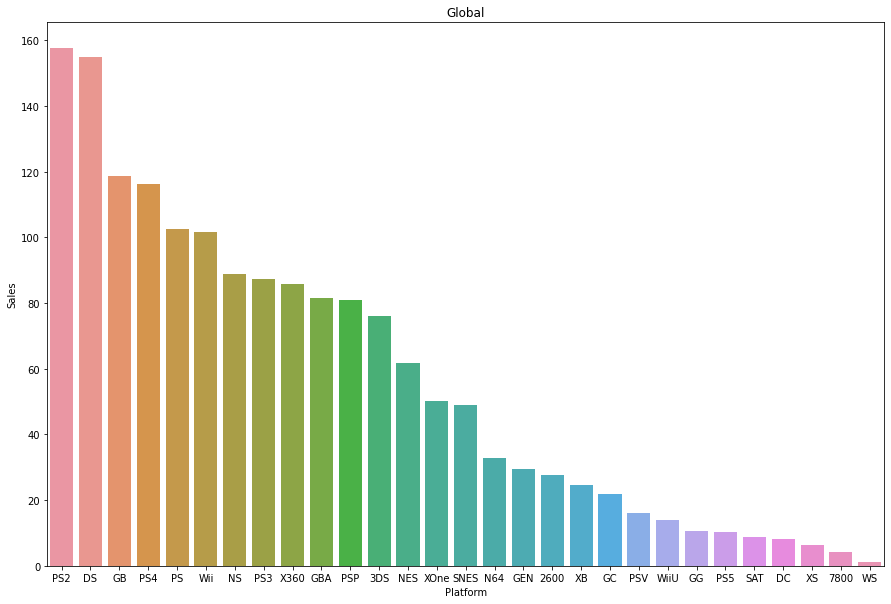

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'Global_Sales')
plt.title('Global')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

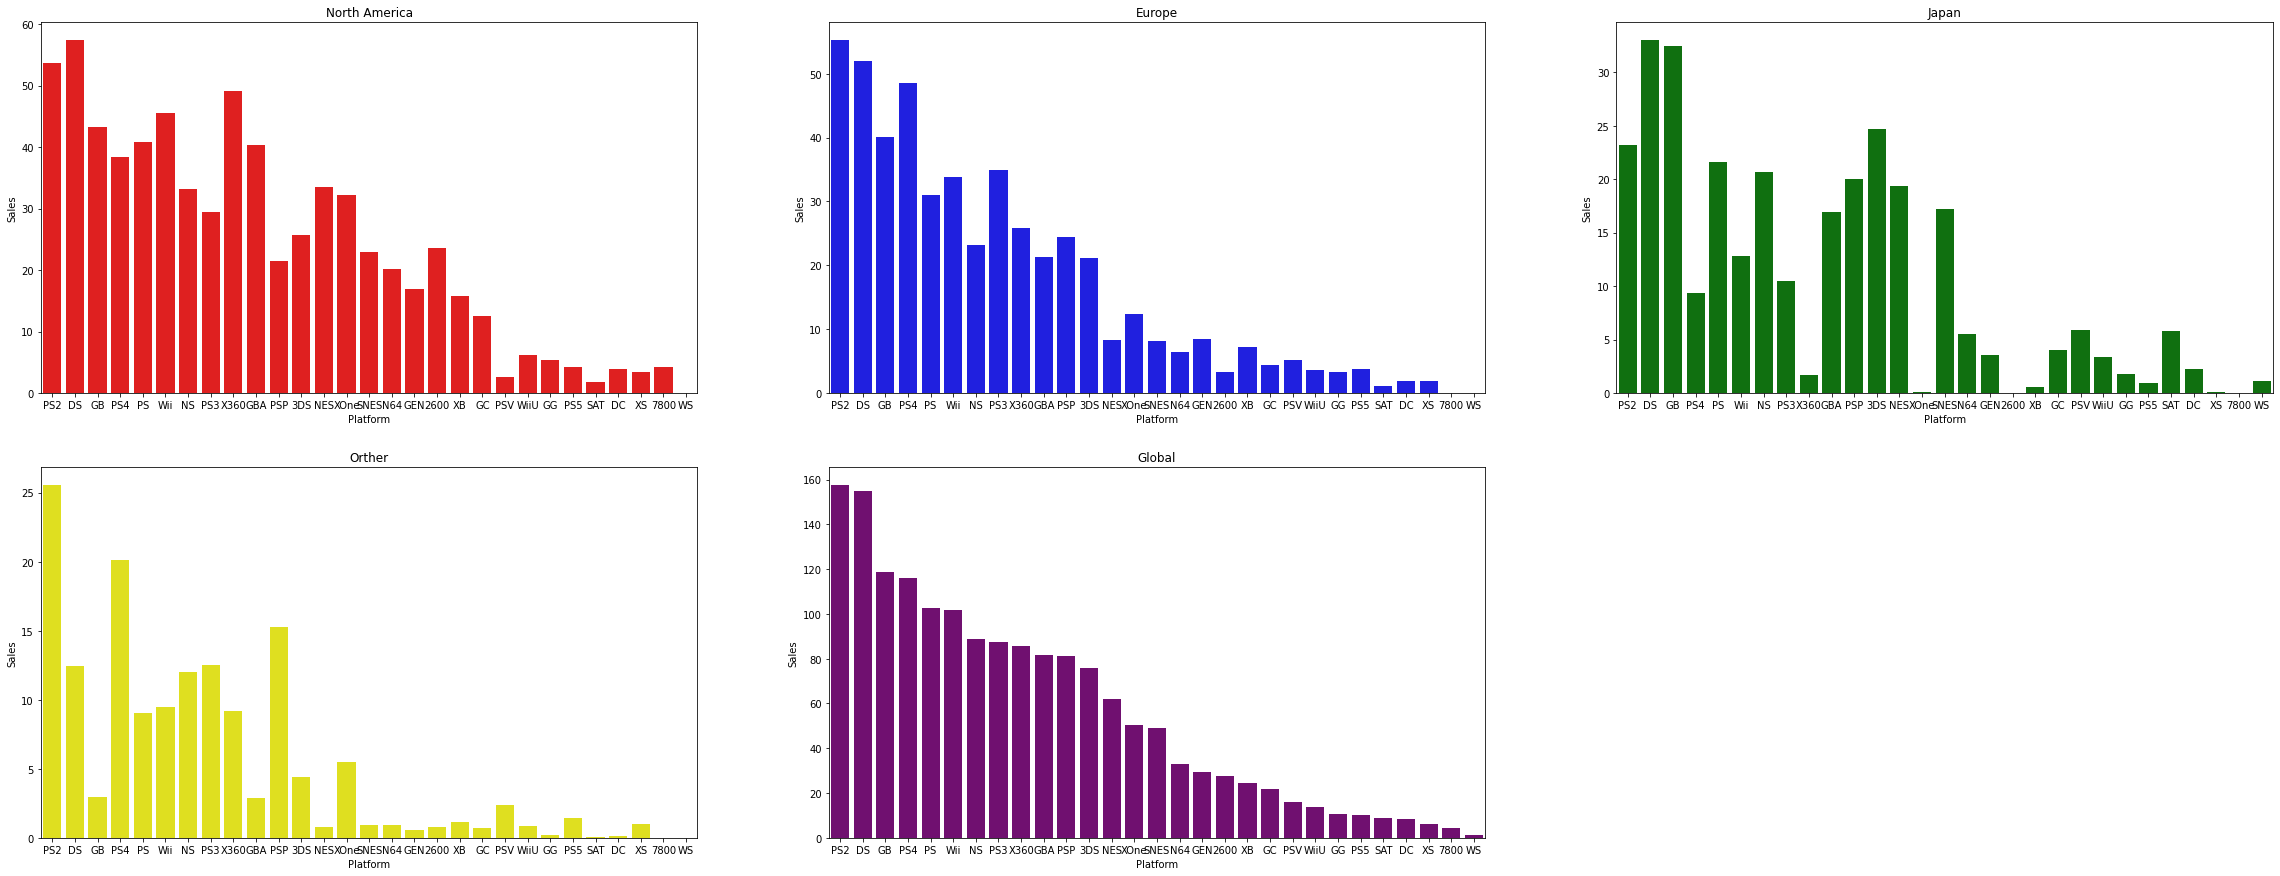

In [ ]:
plt.figure(figsize=(40,15))
plt.subplot(231)
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'NA_Sales',
            color = 'red')
plt.title('North America')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(232)
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'EU_Sales',
            color = 'blue')
plt.title('Europe')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(233)
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'JP_Sales',
            color = 'green')
plt.title('Japan')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(234)
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'Other_Sales',
            color = 'yellow')
plt.title('Orther')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(235)
sns.barplot(data = console_sales_year,
            x = 'Platform',
            y = 'Global_Sales',
            color = 'purple')
plt.title('Global')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

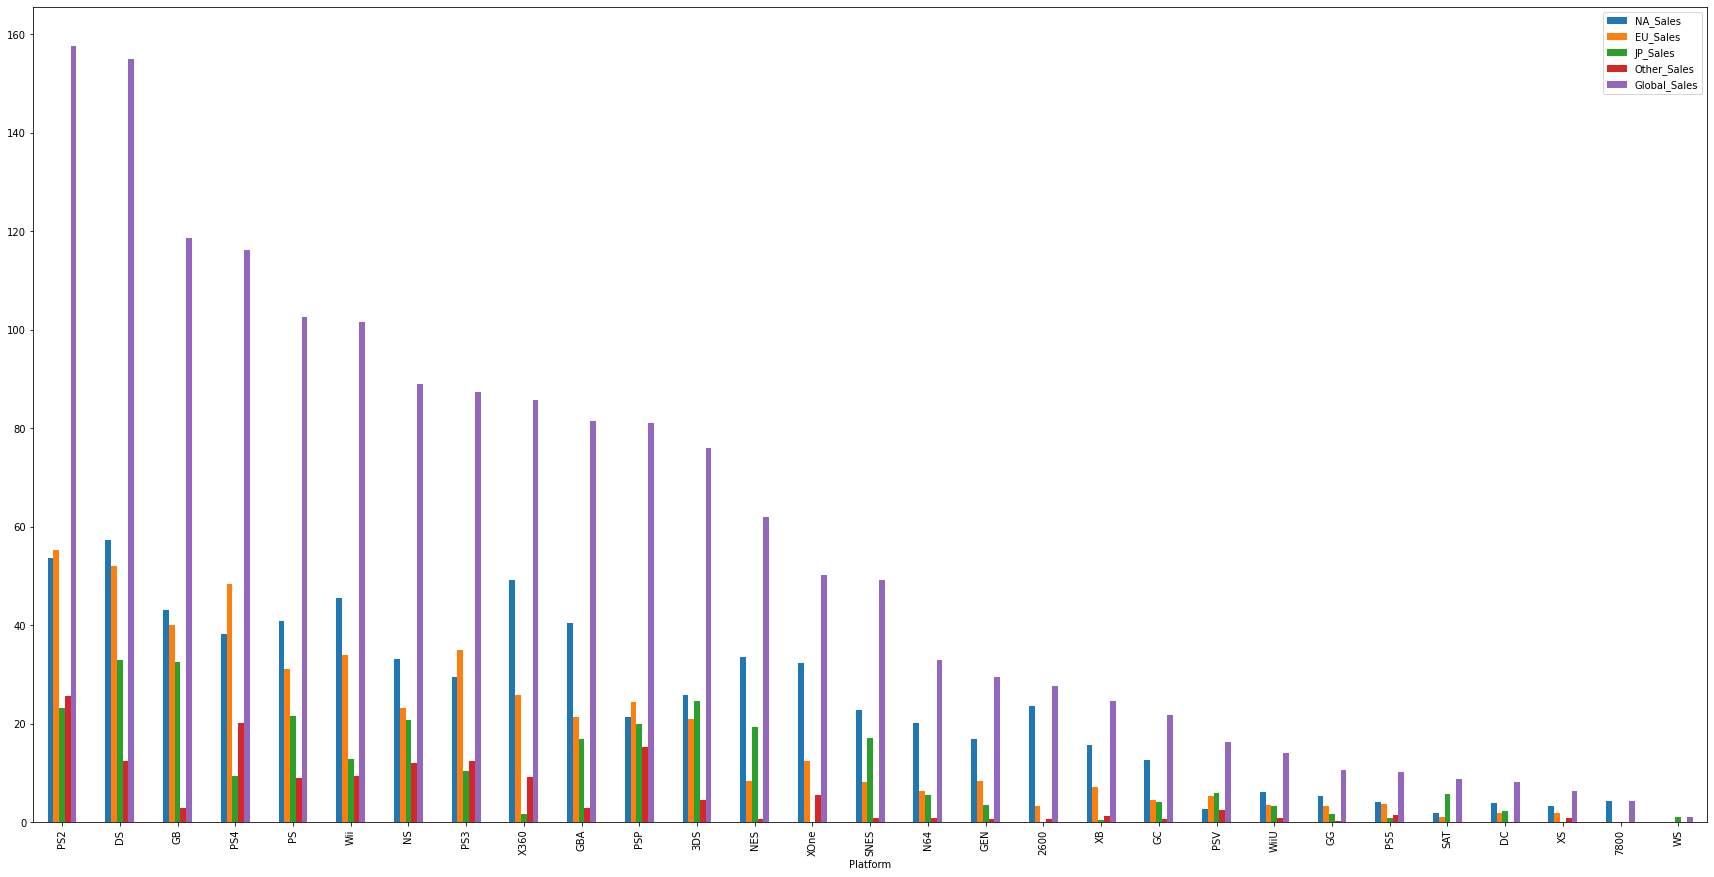

In [ ]:
console_sales_year.plot(kind='bar',x='Platform',figsize=(30,15))

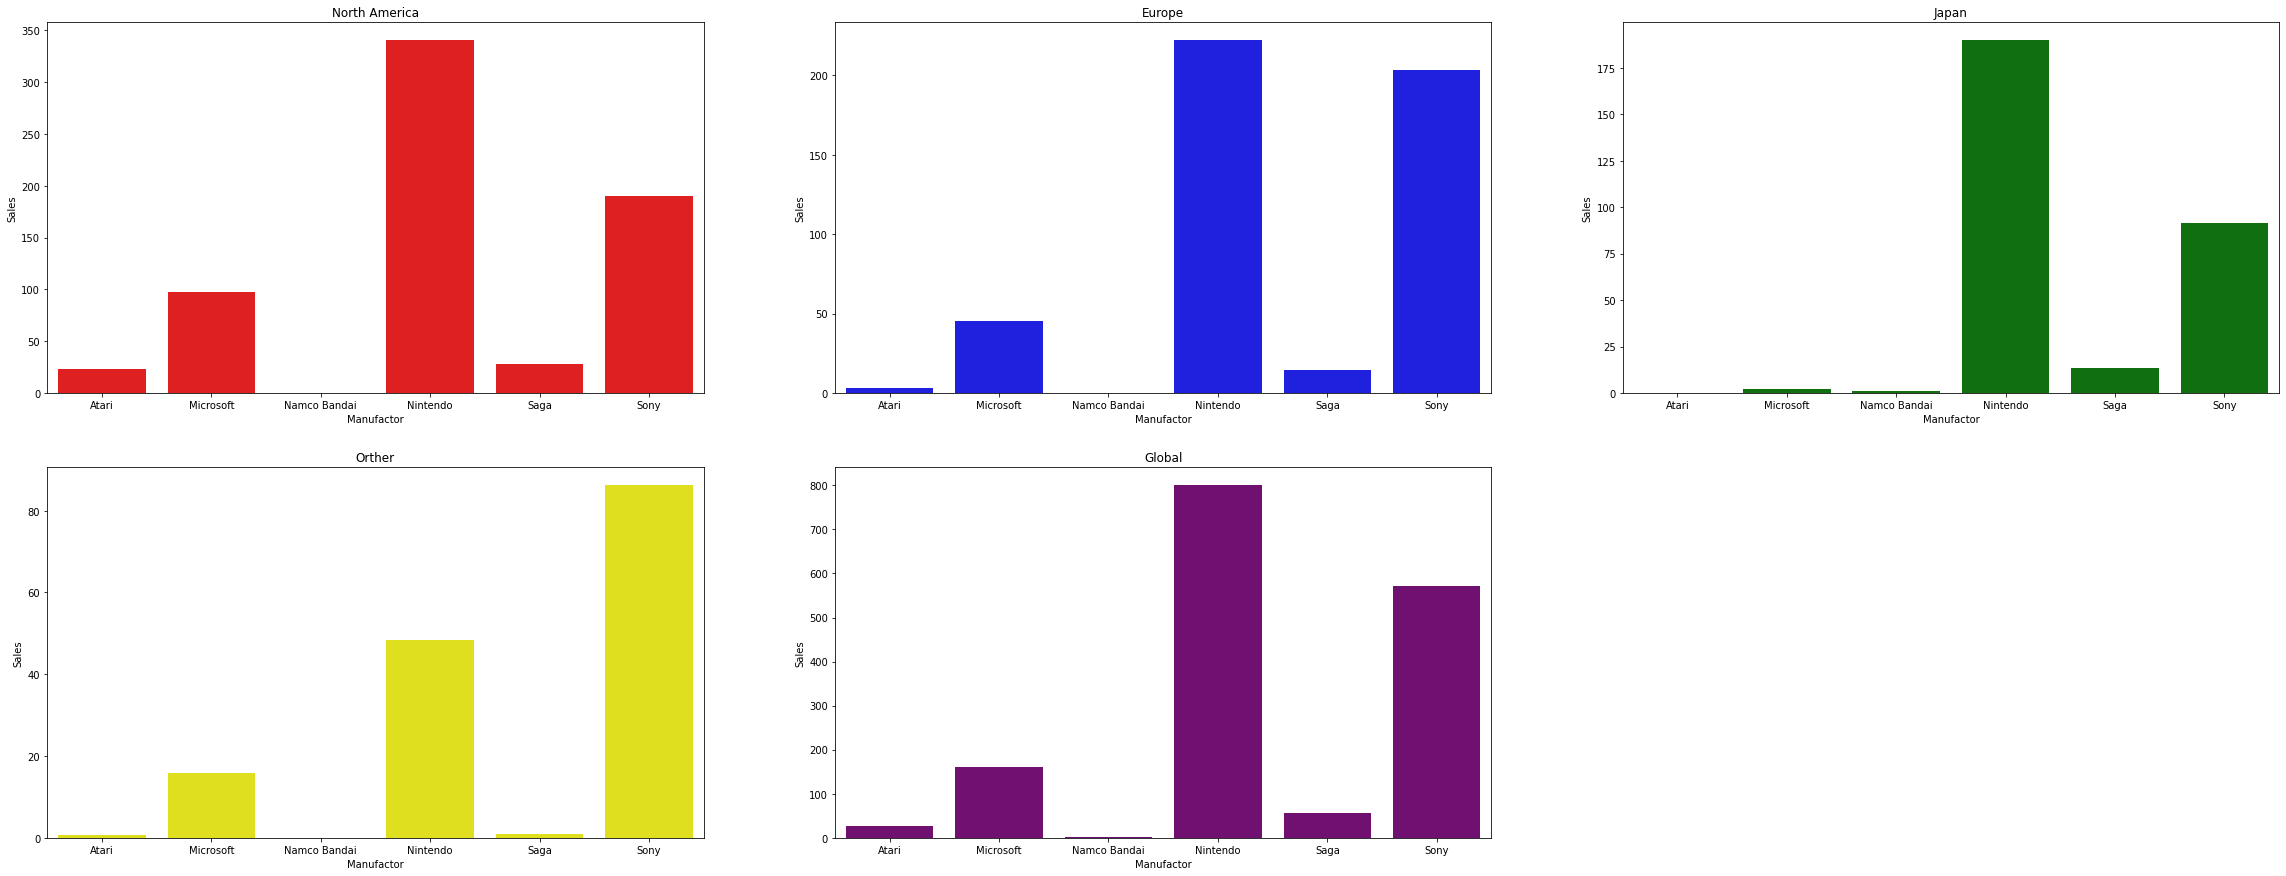

In [ ]:
plt.figure(figsize=(40,15))
plt.subplot(231)
sns.barplot(data = console_Manu_NA,
            x = 'Manufactor',
            y = 'NA_Sales',
            color = 'red')
plt.title('North America')
plt.xlabel('Manufactor')
plt.ylabel('Sales')

plt.subplot(232)
sns.barplot(data = console_Manu_EU,
            x = 'Manufactor',
            y = 'EU_Sales',
            color = 'blue')
plt.title('Europe')
plt.xlabel('Manufactor')
plt.ylabel('Sales')

plt.subplot(233)
sns.barplot(data = console_Manu_JP,
            x = 'Manufactor',
            y = 'JP_Sales',
            color = 'green')
plt.title('Japan')
plt.xlabel('Manufactor')
plt.ylabel('Sales')

plt.subplot(234)
sns.barplot(data = console_Manu_other,
            x = 'Manufactor',
            y = 'Other_Sales',
            color = 'yellow')
plt.title('Orther')
plt.xlabel('Manufactor')
plt.ylabel('Sales')

plt.subplot(235)
sns.barplot(data = console_Manu_global,
            x = 'Manufactor',
            y = 'Global_Sales',
            color = 'purple')
plt.title('Global')
plt.xlabel('Manufactor')
plt.ylabel('Sales')
plt.show()

## **console_sales_game**

In [ ]:
console_sales_game.head()

,Platform_Fullname,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PlayStation 2,PS2,658.26,563.77,222.60,217.32,1661.95
1,Xbox 360,X360,610.56,281.93,12.90,102.64,1008.03
2,PlayStation 3,PS3,400.56,346.10,82.94,145.21,974.81
3,Wii,Wii,509.91,269.66,69.70,116.51,965.78
4,PlayStation,PS,357.97,280.90,244.10,79.04,962.01


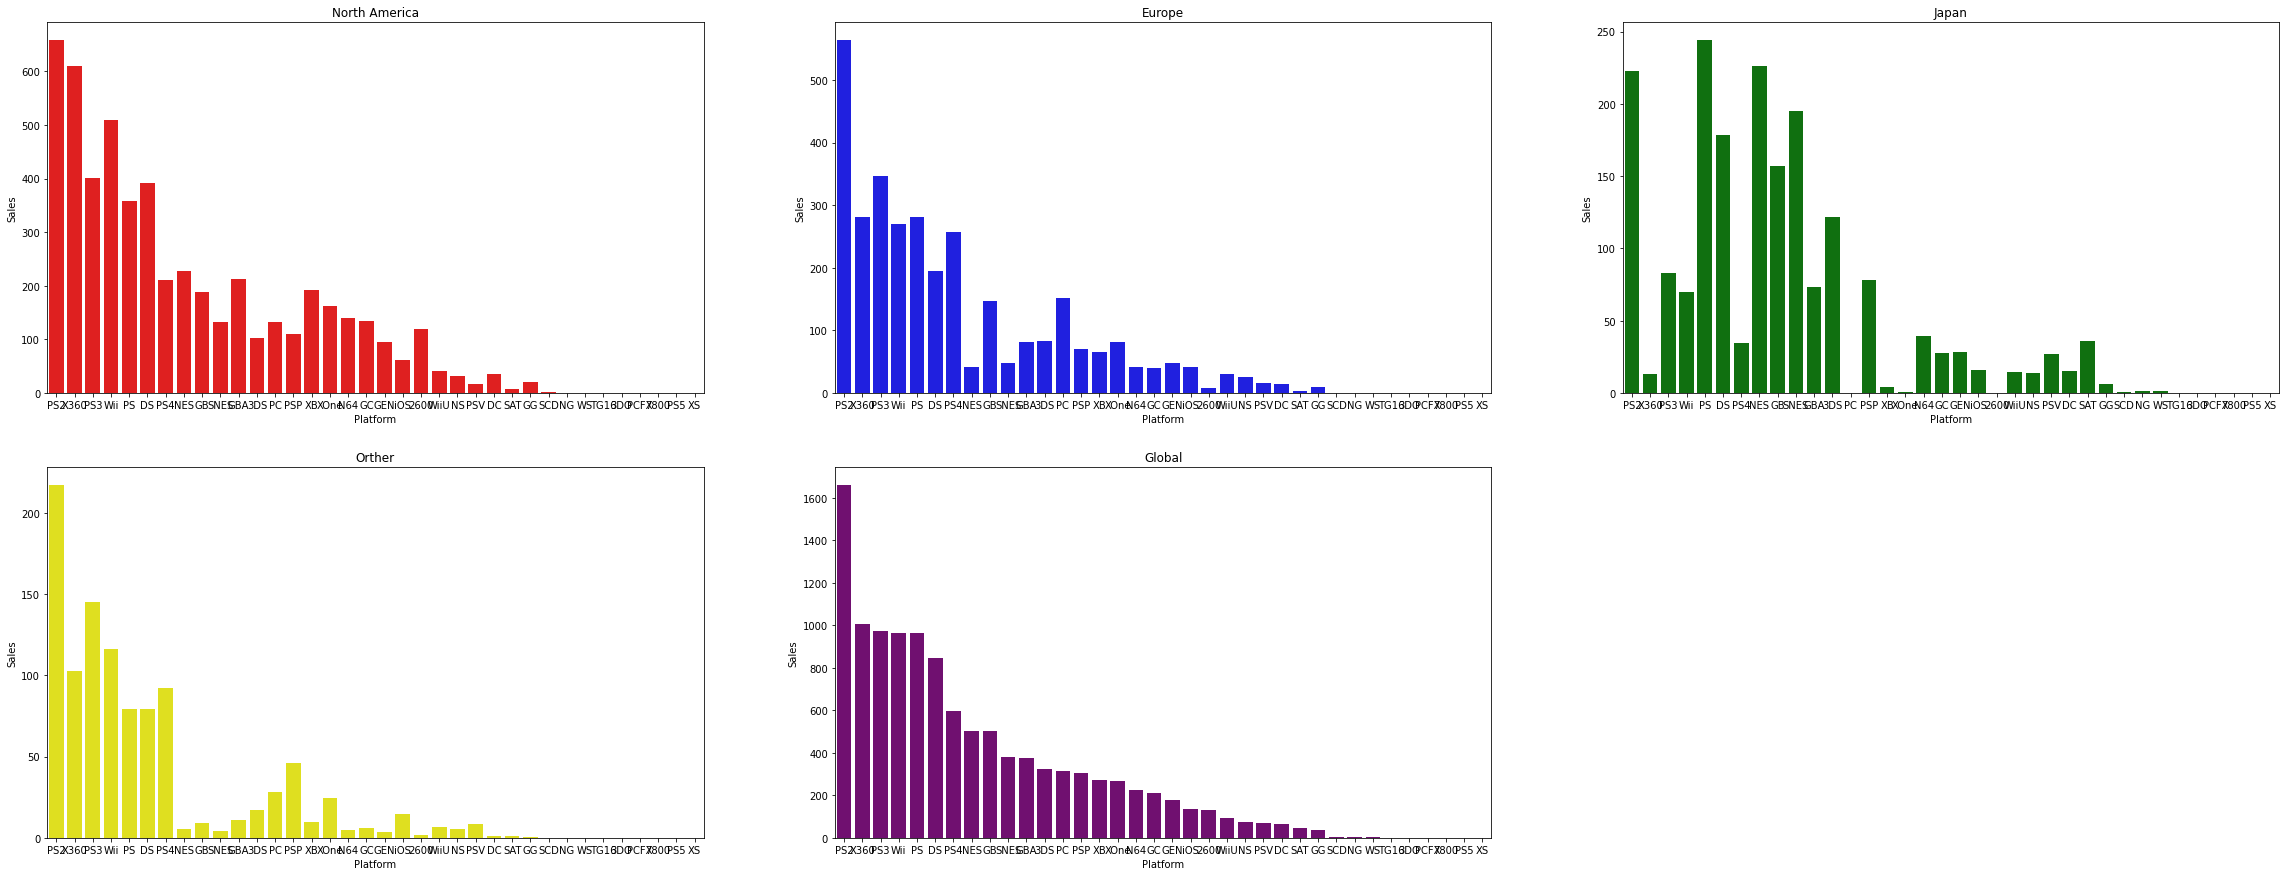

In [ ]:
plt.figure(figsize=(40,15))
plt.subplot(231)
sns.barplot(data = console_sales_game,
            x = 'Platform',
            y = 'NA_Sales',
            color = 'red')
plt.title('North America')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(232)
sns.barplot(data = console_sales_game,
            x = 'Platform',
            y = 'EU_Sales',
            color = 'blue')
plt.title('Europe')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(233)
sns.barplot(data = console_sales_game,
            x = 'Platform',
            y = 'JP_Sales',
            color = 'green')
plt.title('Japan')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(234)
sns.barplot(data = console_sales_game,
            x = 'Platform',
            y = 'Other_Sales',
            color = 'yellow')
plt.title('Orther')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.subplot(235)
sns.barplot(data = console_sales_game,
            x = 'Platform',
            y = 'Global_Sales',
            color = 'purple')
plt.title('Global')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

## **Console_ratio**

In [ ]:
console_sales_ratio.head()

,Platform_Fullname,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Xbox 360,X360,12.43,10.90,7.77,11.21,11.75
1,PlayStation 3,PS3,13.62,9.89,7.92,11.59,11.15
2,Xbox,XB,12.16,9.20,7.32,8.33,11.01
3,PlayStation 2,PS2,12.27,10.20,9.60,8.50,10.54
4,GameCube,GC,10.76,9.01,6.82,8.52,9.60


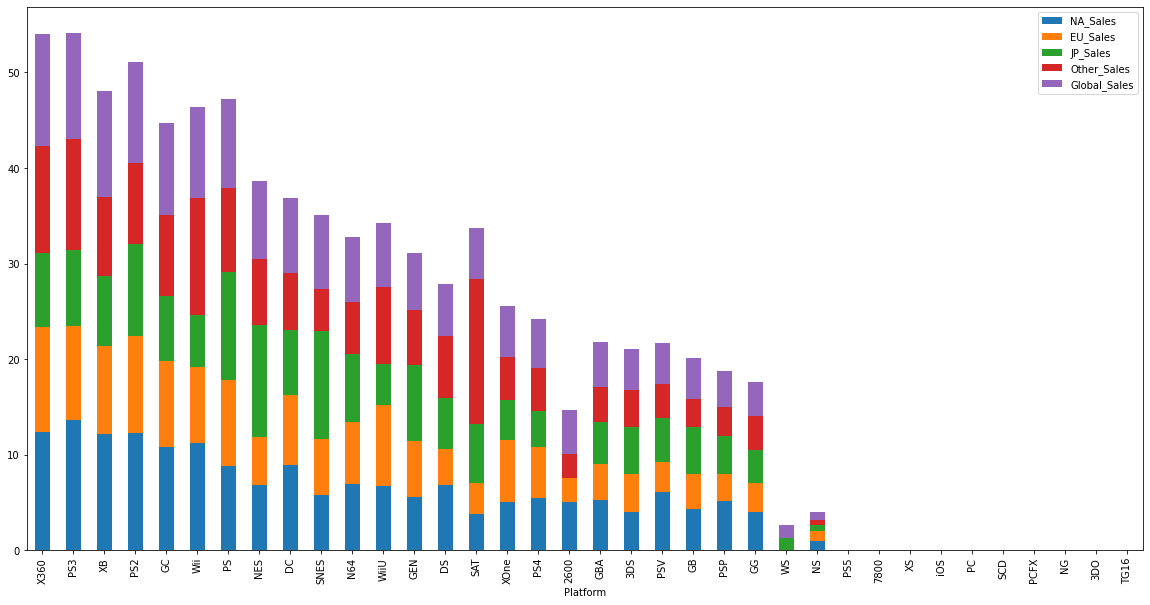

In [ ]:
console_sales_ratio.plot(kind='bar',stacked=True,x='Platform',figsize=(20,10))

# **Export Google Sheet**

In [ ]:
# Connect to Google Sheets
!pip install --upgrade oauth2client gspread

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
sh = gc.create('Console_Sales')

# Choose the sheet to write
worksheet = sh.get_worksheet(0) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, console_sales_year) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# In case you already have one --> Get the ID from Share --> key is the part behind /d/ and before /edit
# https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
sh = gc.open_by_key('1KoqZsdTAbVctYGVysN_-9uoAziejGn8zcmKURBckmmo')

# Choose the sheet to write
worksheet = sh.get_worksheet(1) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, console_sales_game) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

worksheet = sh.get_worksheet(2) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, console_sales_ratio) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

worksheet = sh.get_worksheet(3) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, console_Manu_global) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

worksheet = sh.get_worksheet(4) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, console_Manu_other) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

worksheet = sh.get_worksheet(5) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, console_Manu_JP) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

worksheet = sh.get_worksheet(6) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, console_Manu_NA) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

worksheet = sh.get_worksheet(7) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, console_Manu_EU) #-> THIS EXPORTS YOUR DATAFRAME TO THE GOOGLE SHEET

